In [3]:
#load data, condensed as we did this previously
def load_clinical_eeg_data(datapath, sub):
    import pandas as pd
    alldata = pd.read_csv(os.path.join(datapath, sub + '.csv')) #removed 'train' bc of how I saved
    alldata.rename(columns={'Unnamed: 0': 'Index'})
    eegevents = alldata[['labels', 'chunks']]
    alldata.drop(['Unnamed: 0', 'labels', 'chunks'], axis=1, inplace=True)
    names = alldata.keys()
    return alldata.iloc[:].as_matrix(), eegevents, names
import os
import numpy as np
os.chdir("C:\\Users\\adam1brownell\\Desktop\Winter2017\\188B Files\Project")
path = os.getcwd()

#Get subject names from appropriate dir, -4 for .csv suffux
subjects = [f[:-4] for f in os.listdir(path)]

data, label_chunk, nodes = load_clinical_eeg_data(path,subjects[3])

(323712L,)


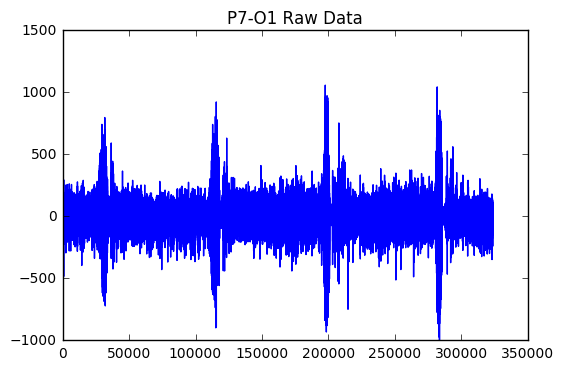

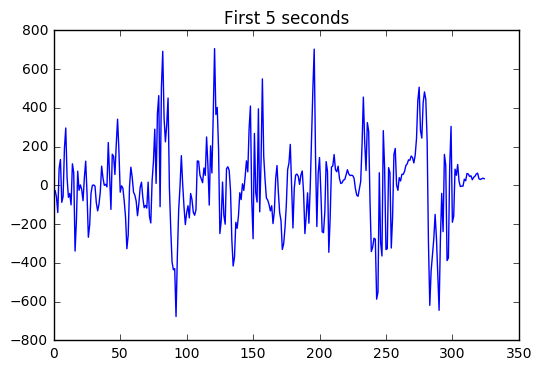

In [4]:
#Visualize Raw Data
import matplotlib.pyplot as plt

#Random Node choice
x = data[:,3]
print x.shape
time = [i for i in range(len(x))]
plt.plot(time,x)
plt.title(nodes[3] + " Raw Data")
plt.show()
#plt.plot(time[1:325], x[1:325], label = "10min Before")
seiz = 200000
plt.plot(time[1:325], x[seiz-324:seiz], label = "Seizure")
plt.title("First 5 seconds")
plt.show()

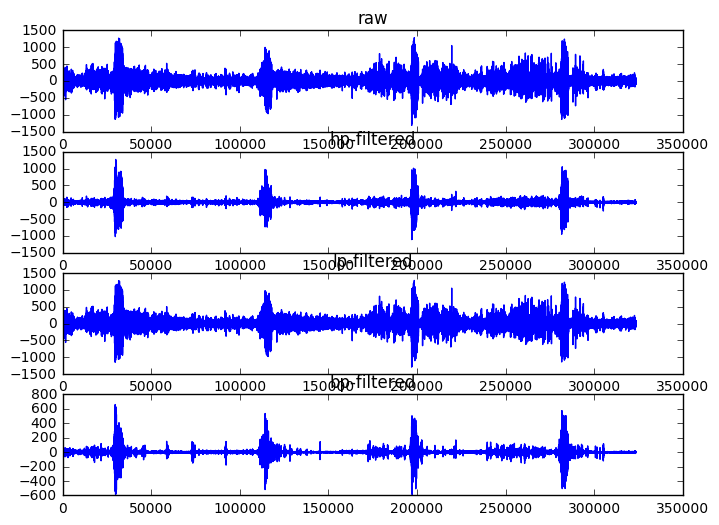

In [15]:
#Jeff Code

def apply_filters(x, order=4, fs=512.0, filt=None, btype='low', axis=0):
    from scipy.signal import butter, filtfilt
    nyq = .5 * fs
    
    if filt is None:
        return x
    if isinstance(filt, list):
        f = [i/nyq for i in filt]
        btype='band'
    else:
        f = filt/nyq
        
    b, a = butter(order, f, btype=btype, analog=False)
    x = filtfilt(b, a, x, axis=axis)
    return x

def plot_filter(order=4, fs=512.0, filt=None, btype='low'):
    from scipy.signal import decimate, butter, freqs
    nyq = .5 * fs
    if filt is None:
        return None
    if isinstance(filt, list) and len(filt) > 1:
        f = [i/nyq for i in filt]
        btype='band'
    else:
        f = filt/nyq
    b, a = butter(order, f, btype=btype, analog=True)
    w, h = freqs(b, a)
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.xscale('log')
    plt.title('Butterworth filter frequency response')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(100, color='green') # cutoff frequency
    plt.show()

f, axarr = plt.subplots(4, 1, figsize=(8, 6))
axarr[0].plot(data[:,0])
axarr[0].set_title('raw')


x_filt = apply_filters(data[:,0], order=4, fs=64, filt=5, btype='high')
axarr[1].plot(x_filt)
axarr[1].set_title('hp-filtered')


x_filt = apply_filters(data[:,0], order=4, fs=64, filt=25, btype='low')
axarr[2].plot(x_filt)
axarr[2].set_title('lp-filtered')

x_filt = apply_filters(data[:,0], order=4, fs=64, filt=[12, 30], btype='band')
axarr[3].plot(x_filt)
axarr[3].set_title('bp-filtered')
plt.show()

In [18]:
def one_sec_chunks(data):
    i = 0
    j = 0
    sec_array = [[] for i in range(len(data)/64)]
    while i <= len(data):
        sec_array[j] = np.array(data[i:i+64])
        i = i +64
        j = j + 1
                 
    return np.array(sec_array)

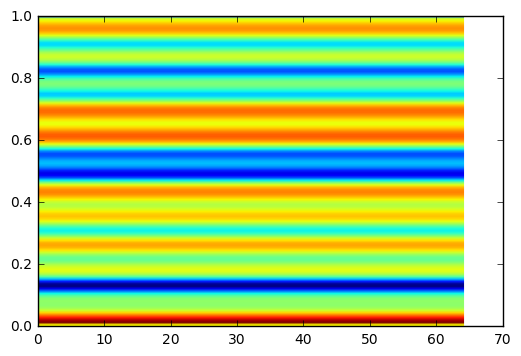

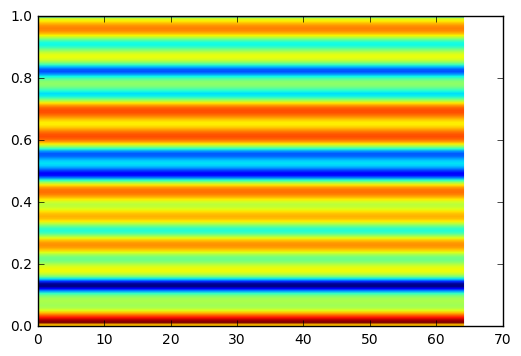

26720
1.0


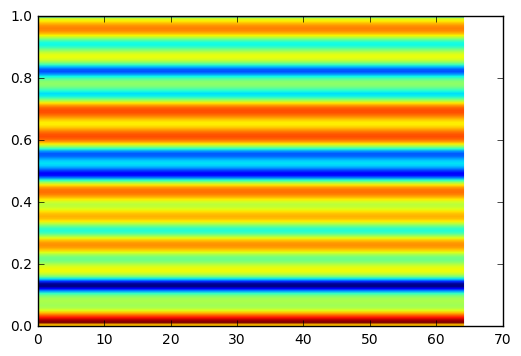

26720
1.0


In [54]:
from scipy import signal
import numpy as np
#build a 1 second time signature
#Pass band filter on each node
data2 = apply_filters(data,order =4, fs=64, filt=[12, 32], btype='band')

#sec_array = one_sec_chunks(data2)
#f,t, Sxx = signal.spectrogram(sec_array[0], fs=64, axis = 0)
#plt.specgram(Sxx)
#plt.show()

#labels = np.array(label_chunk)[:,0]
#i = 32
#while labels[i-32] != 1:
#    i = i+1
#f,t, Sxx = signal.spectrogram(sec_array[i%64], fs=64, axis = 0)
#plt.specgram(Sxx)
#plt.show()
#print i
#print labels[i]

#j = 30
#while labels[j-32] != 1:
#    j = j+1
#f,t, Sxx = signal.spectrogram(sec_array[j%64], fs=64, axis = 0)
#plt.specgram(Sxx)
#plt.show()
#print i
#print labels[i]

In [37]:
test = np.array([[3,3,3],
                 [3,3,3]])
def f(array):
    return array*2
np.apply_along_axis(np.sum,0,test)

array([6, 6, 6])